# **Standardize the dataset (e.g., using StandardScaler).**

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_dataset.csv')

In [8]:
# 1: Select numerical features to scale
features_to_scale = ['Likes', 'Retweets', 'Hour', 'Day', 'Month']

# 2: Initialize the StandardScaler
scaler = StandardScaler()

# 3: Fit and transform the data
scaled_features = scaler.fit_transform(df[features_to_scale])

# 4: Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Combine with non-numeric columns if needed
# For example, keep Sentiment, Platform, etc.
non_numeric = df.drop(columns=features_to_scale)
final_df = pd.concat([scaled_df, non_numeric.reset_index(drop=True)], axis=1)

# Display the standardized dataset
print("Standardized Dataset Preview:\n")
print(final_df.head())

Standardized Dataset Preview:

      Likes  Retweets      Hour       Day     Month  Unnamed: 0  \
0 -0.916295 -0.922303 -0.856774 -0.058718 -1.502582           0   
1 -2.336727 -2.339444 -1.829867 -0.058718 -1.502582           1   
2 -0.206079 -0.213733 -0.126954 -0.058718 -1.502582           2   
3 -1.981619 -1.914302  0.602866 -0.058718 -1.502582           3   
4 -1.271403 -1.347445  0.846139 -0.058718 -1.502582           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX       

# **Apply K-Means clustering and determine the optimal number of clusters using the elbow method.**

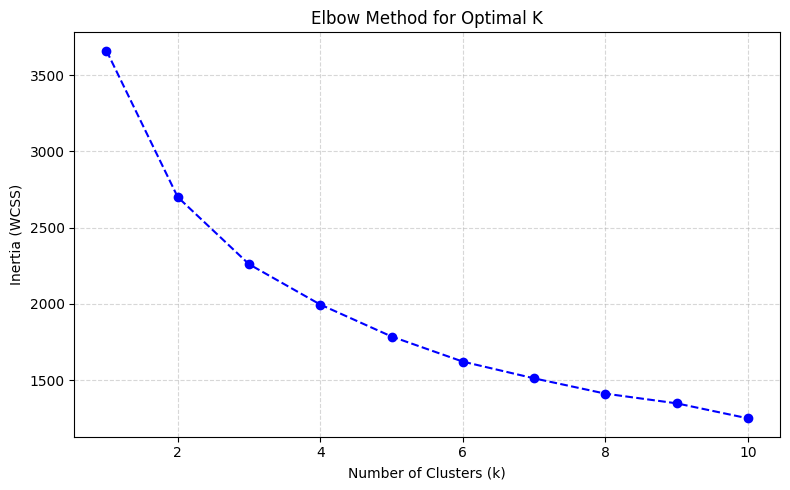

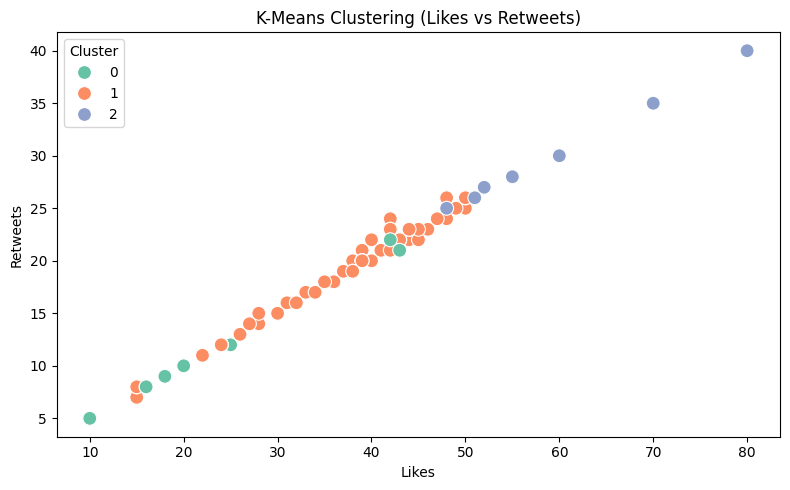

In [9]:
features = ['Likes', 'Retweets', 'Hour', 'Day', 'Month']
X = df[features]

# 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3: Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4: Apply KMeans with optimal k (e.g., k=3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataset
df['Cluster'] = clusters

# 5: Visualize clusters (e.g., Likes vs Retweets)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Likes', y='Retweets', hue='Cluster',palette='Set2', data=df, s=100)
plt.title('K-Means Clustering (Likes vs Retweets)')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# **Visualize clusters using 2D scatter plots.**

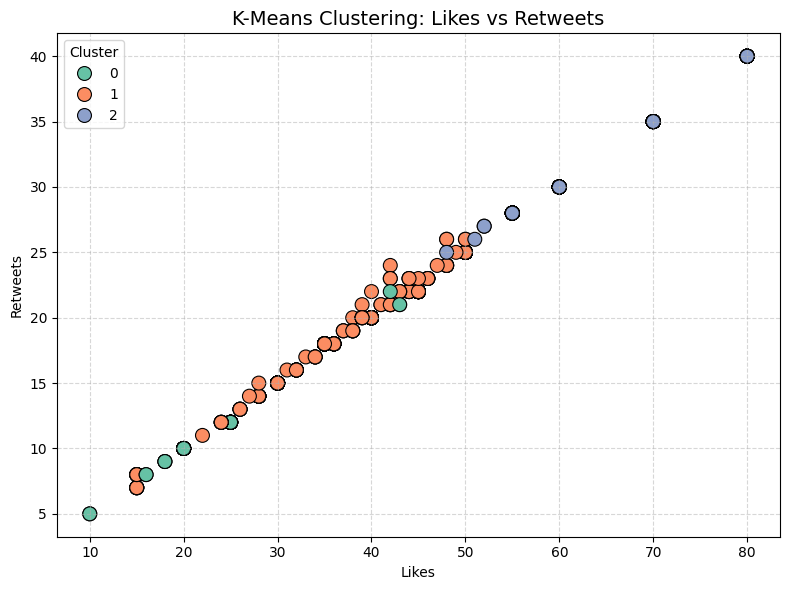

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3: 2D Scatter plot - Likes vs Retweets colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='Likes',y='Retweets',hue='Cluster',palette='Set2',s=100,edgecolor='black')

plt.title("K-Means Clustering: Likes vs Retweets", fontsize=14)
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()